# K-Means Clustering Algorithm

A basic implementation of the K-means algorithm to a cluster randomly generated data set. 


In [113]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import math
import random

In [114]:
def compute_euclidean_distance(start, end, m):
    sum = 0
    for i in range(0, m):
        sum += math.pow(start[i]-end[i], 2)
    return math.sqrt(sum)
    # return math.sqrt(pow(start[0]-end[0], 2) + pow(start[1]-end[1], 2))

def initialise_centroids(X, K=4):
    centroids = [X[random.randint(0, len(X))] for i in range(K)]
    return centroids


In [115]:
def k_means(X, centroids, m, K=4):
    assigned_cluster = []
    for idx, xi in enumerate(X):
        distances = [compute_euclidean_distance(xi, centroids[i], m) for i in range(K)]
        index = distances.index(min(distances))
        assigned_cluster.append(index)


    converged = False
    while not converged:
        converged = True
        for idx, xi in enumerate(X):
            distances = [compute_euclidean_distance(xi, centroids[i], m) for i in range(K)]
            index = distances.index(min(distances))
            if assigned_cluster[idx] != index:
                converged = False
            assigned_cluster[idx] = index
    return assigned_cluster


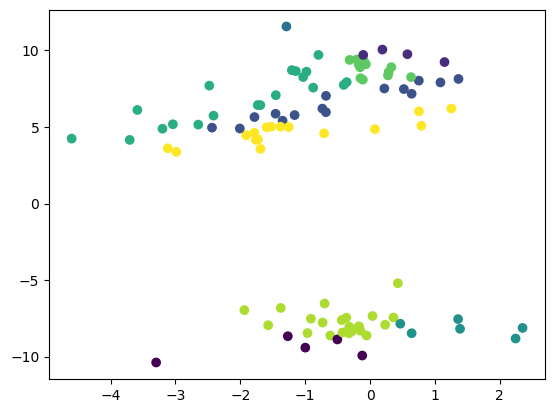

In [116]:
K = 9 # number of clusters 
m = 2 # number of attributes
X, clusters = make_blobs( n_samples=100, n_features=m, cluster_std=1.0 ) # data set
centroids = initialise_centroids(X, K)
assigned_cluster = k_means(X, centroids, m, K)
plt.scatter(X[:, 0], X[:, 1], c=assigned_cluster)
plt.show()


### Within Cluster Distance metric

In [117]:
wc = 0
for j in range(len(centroids)):
    sumj = 0
    for i in range(len(X)):
        if assigned_cluster[i] == j:
            distance = compute_euclidean_distance(centroids[j], X[i], m)
            sumj += pow(distance, 2)
    wc += sumj
print(f'Within cluster distance: {wc}')    


Within cluster distance: 420.3732288688405


### Between Cluster Distance metric

In [118]:
bc = 0

for ci in centroids:
    for cl in centroids:
        distance = compute_euclidean_distance(ci, cl, m)
        squared_distance = pow(distance, 2)
        bc += squared_distance

print(f'Between cluster distance {bc}')

Between cluster distance 11121.307900486503


### Overall Cluster score

In [119]:
score = bc/wc
print(f'Overall cluster score: {score}')

Overall cluster score: 26.45579484310223
